In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
def generate_graph(n, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                G.add_edge(i, j)
    return G

In [8]:
def plot_graph(G):
    fig, ax = plt.subplots()
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='blue', node_size=500, font_size=10, ax=ax)
    plt.show()

In [9]:
def analyze_graph(G):
    giant_cluster_size = 0
    for component in nx.connected_components(G):
        if len(component) > giant_cluster_size:
            giant_cluster_size = len(component)

    return giant_cluster_size / G.number_of_nodes()

In [10]:
n = 100  # Number of nodes
p = 0.1  # Probability of connecting two nodes


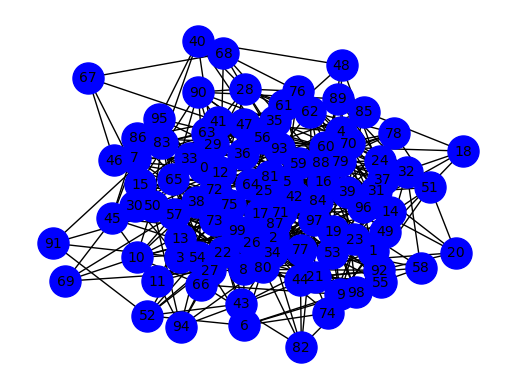

Giant cluster ratio: 1.0


In [11]:
G = generate_graph(n, p)
plot_graph(G)
giant_cluster_ratio = analyze_graph(G)
print(f"Giant cluster ratio: {giant_cluster_ratio}")